## Import All Dependacies

In [ ]:
%pip install -e .

In [6]:
%%capture --no-stderr
%pip install --quiet pyppeteer
%pip install --quiet nest_asyncio

### Import allGraphs From Project

In [5]:
from IPython.display import Image, display, HTML
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
import sys
from typing import List, Tuple
import math

sys.path.insert(0, '/Users/macbook/machine-learning/projects/swe-agent/src')

# Import all graphs
from swe_graph import graph as main_graph
from swe_graph.researcher_graph.graph import graph as researcher_graph
from swe_graph.analyser_sub_graph.graph import graph as analyser_graph
from swe_graph.development_sub_graph.graph import graph as development_graph
from swe_graph.monorepo_sub_graph.graph import graph as monorepo_graph
from swe_graph.review_and_documentation_sub_graph.graph import graph as documentation_graph

app = main_graph


## Draw a Diagram to Rep my Graph

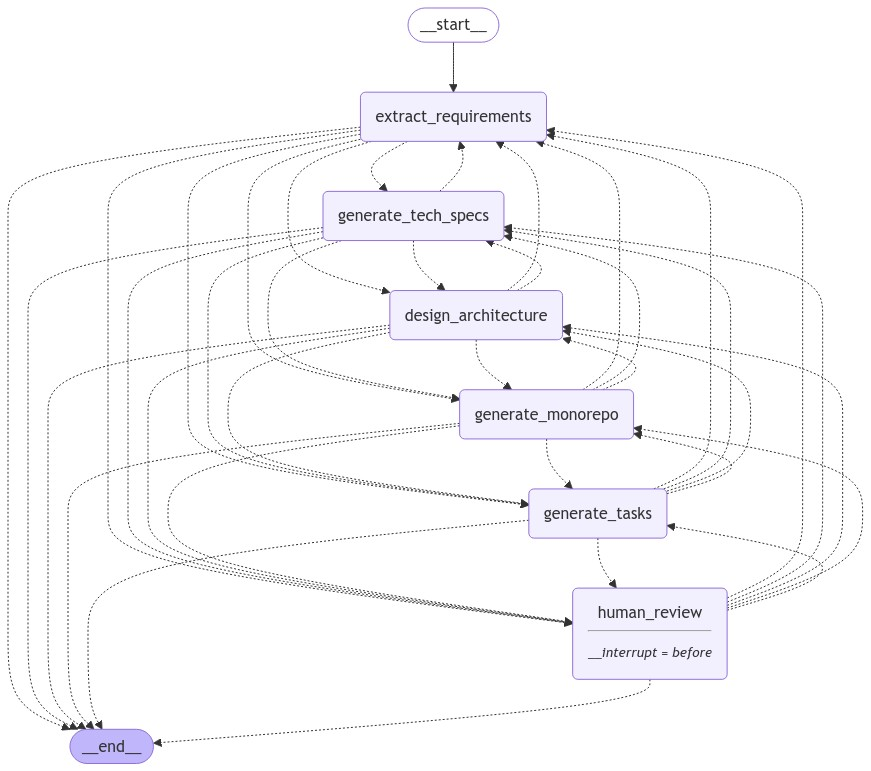

In [23]:

def create_graph_pairs() -> List[Tuple[str, object]]:
    """
    Create pairs of graph titles and their corresponding graph objects.
    Returns a list of tuples containing (title, graph_object).
    """
    return [
        # ("Main System Graph", main_graph),
        # ("Researcher Workflow", researcher_graph),
        ("Code Analysis Pipeline", analyser_graph),
        # ("Development Workflow", development_graph),
        # ("Monorepo Structure", monorepo_graph),
        # ("Documentation Process", documentation_graph)
    ]

def display_mermaid_graph(monorepo_graph):
    """
    Display a Mermaid graph with optimized default settings.
    
    Args:
        monorepo_graph: The monorepo graph object to visualize
    """
    import nest_asyncio

    nest_asyncio.apply() 

    display(
        Image(
            monorepo_graph.get_graph().draw_mermaid_png(
                draw_method=MermaidDrawMethod.API
            )
        ),
        # Image(
        #     monorepo_graph.get_graph().draw_mermaid_png(
            
        #     curve_style=CurveStyle.LINEAR,
        #     node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#fad7de"),
        #     wrap_label_n_words=9,
        #     output_file_path=None,
        #     draw_method=MermaidDrawMethod.PYPPETEER,
        #     background_color="white",
        #     padding=10,
        # )
        # )
    )




def display_graphs():
    """
    Generate and display all graphs in a grid layout with titles.
    """
    # Generate all graph images with their titles
    graph_images = []
    for title, graph_obj in create_graph_pairs():
        display_mermaid_graph(graph_obj)
    
   

display_graphs()

## Run the Workflow (Graph)

In [6]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("ANTHROPIC_API_KEY")


### Invoke Graph

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableConfig

app = analyser_graph

config = {
        "thread_id": "1",
        "checkpoint_ns": "test_namespace",
        "checkpoint_id": "1",
    }
    
inputs = {"messages": [HumanMessage(content="build ecommerce site")]}
await app.ainvoke(inputs, config=config)

### Streaming Node Output

In [ ]:
import pprint


async for output in app.astream(inputs, stream_mode="updates",config=config):
    # stream_mode="updates" yields dictionaries with output keyed by node name
  
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(pprint.pformat(value))
    print("\n---\n")

### Streaming LLM Tokens


In [27]:

async for output in app.astream_log(inputs, include_types=["llm"],config=config):
    # astream_log() yields the requested logs (here LLMs) in JSONPatch format
    for op in output.ops:
        if op["path"] == "/streamed_output/-":
            # this is the output from .stream()
            ...
        elif op["path"].startswith("/logs/") and op["path"].endswith(
            "/streamed_output/-"
        ):
            # because we chose to only include LLMs, these are LLM tokens
            try:
                content = op["value"].content[0]
                if "partial_json" in content:
                    print(content["partial_json"], end="|")
                elif "text" in content:
                    print(content["text"], end="|")
                else:
                    print(content, end="|")
            except:
                pass

{'id': 'toolu_017Uf7aZoCdY4UDhAGjwRMoT', 'input': {}, 'name': 'Response', 'type': 'tool_use', 'index': 0}||{"re|quir|ements": {"f|unc|tional": |["Get| curre|nt weather i|nformatio|n |for |San Fra|ncisco, C|al|ifo|rnia|"], "|non_function|al"|: [], "sy|stem": []}}|Routing to generate_tech_specs
Generating technical specifications for state:
Routing to design_architecture
Designing system architecture for state:
Routing to generate_monorepo
Generating monorepo structure for state:
Routing to generate_tasks
Generating tasks for state:
Routing to human_review
